# View modes


## First the graph

In [1]:
import numpy as np
import ngsolve as ng
import matplotlib.pyplot as plt

from fiberamp.fiber.microstruct.pbg import ARFcsg as ARF2
from ngsolve.webgui import Draw


importing NGSolve-6.2.2203-56-g47f483033


/home/pv/.local/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/pv/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


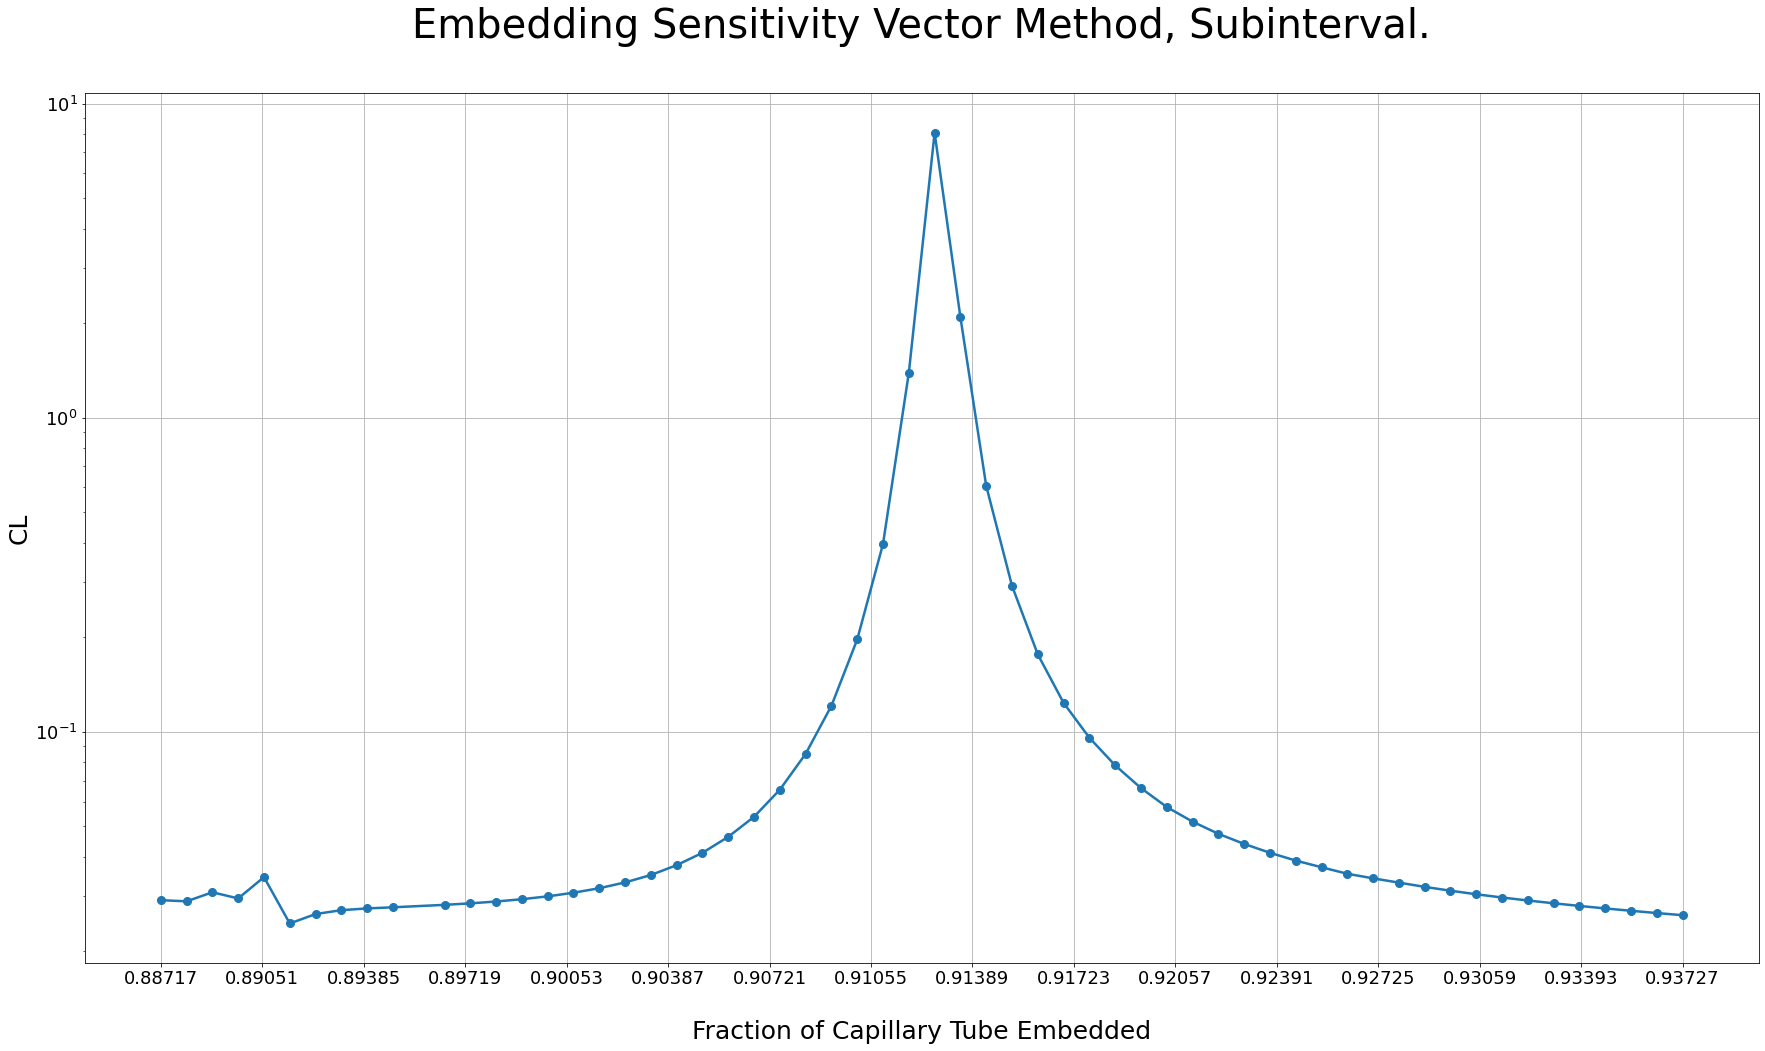

<Figure size 432x288 with 0 Axes>

In [2]:
%matplotlib inline
%run graph.py

## Load e values and get indices of modes we want to view

In [4]:
Es = np.load('outputs/E_sub_212_224.npy')

In [5]:
indices = np.where(((1-Es)>.084)*((1-Es)<.09))[0]
indices

array([27, 28, 29, 30, 31, 32, 33])

In [7]:
Es[27]

0.9100953691227573

In [9]:
a = ARF2()


ModeSolver: Checking if mesh has required regions
Mesh has  3536  elements,  1783  points,  and  5318  edges.


In [10]:
Draw(a.mesh)

WebGuiWidget(value={'ngsolve_version': '6.2.2203-56-g47f483033', 'mesh_dim': 2, 'order2d': 2, 'order3d': 2, 'd…

BaseWebGuiScene

In [11]:
i = indices[3]

mesh_path = 'modes/mesh_e_sub' + str(i)
mode_path = 'modes/mode_e_sub' + str(i)

mesh, modes = a.load_E_modes(mesh_path, mode_path, use_pickle=False)

In [14]:
for e in modes:
    Draw(1e2*e.real[0], mesh, min=0, max=2)

WebGuiWidget(value={'ngsolve_version': '6.2.2203-56-g47f483033', 'mesh_dim': 2, 'order2d': 2, 'order3d': 2, 'd…

WebGuiWidget(value={'ngsolve_version': '6.2.2203-56-g47f483033', 'mesh_dim': 2, 'order2d': 2, 'order3d': 2, 'd…

In [9]:
import netgen.gui

optfile ./ng.opt does not exist - using default values
togl-version : 2
loading ngsolve library
NGSolve-6.2.2203-56-g47f483033
Using Lapack
Including sparse direct solver UMFPACK
Running parallel using 16 thread(s)


In [34]:
e = modes[0]
ng.Draw(-1e2*e.real[0], mesh, 'emodes')

Snapshot to file '/home/pv/papers/arf_embedding/figures/typical_fundamental.jpg
Thank you for using NGSolve


In [12]:
e.real